# Brent COT Commercial Forecasting EDA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import scipy.stats as stats

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates
from src.utils.io.read import PreprocessedDataReader

In [9]:
from src.preprocessing.base import FutureTicker

In [10]:
from src.settings import Settings

In [11]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.BRENT)

In [14]:
dataset.shape

(757, 81)

In [15]:
dataset.tail(3)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
754,2025-06-17,CO,-472619.0,1203629.0,1676248.0,5387.0,519260.0,513873.0,-73318.0,-12500.0,...,1746707.0,-53127.0,208792.0,-766204.0,9.58,-9.31,8.77,-8.73,8.18,-8.32
755,2025-06-24,CO,-432876.0,1189626.0,1622502.0,-6746.0,498013.0,504759.0,39743.0,-73318.0,...,-53127.0,-1301754.0,-766204.0,-726115.0,-9.31,0.94,-8.73,0.94,-8.32,0.85
756,2025-07-01,CO,-427357.0,1092550.0,1519907.0,-8225.0,475395.0,483620.0,5519.0,39743.0,...,-1301754.0,NaN,-726115.0,NaN,0.94,NaN,0.94,NaN,0.85,NaN


In [16]:
dataset['tradeDate'].min(),dataset['tradeDate'].max()

('2011-01-04', '2025-07-01')

In [17]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date 

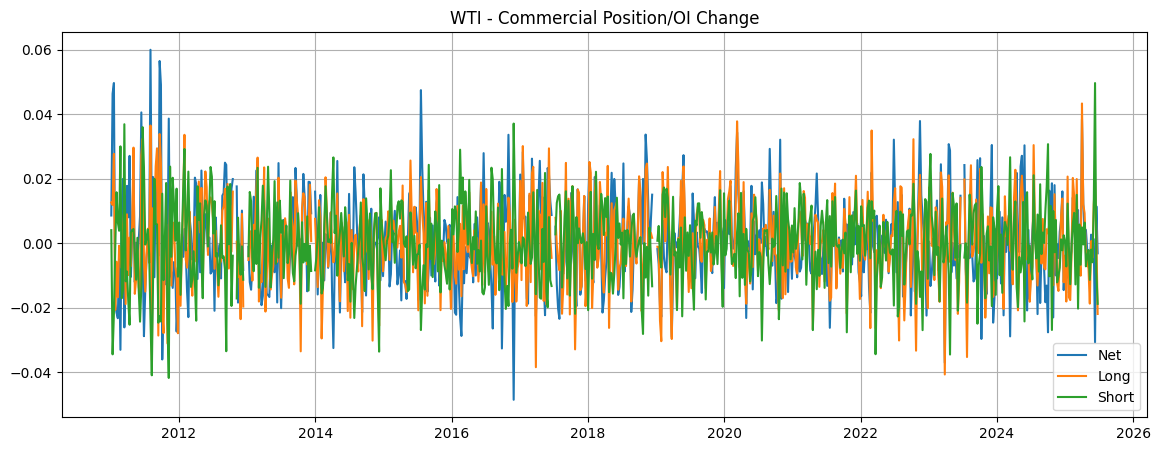

In [18]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['forward_Commercial_NetPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['forward_CommercialLongPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['forward_CommercialShortPosition_to_openinterest_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Commercial Position/OI Change')
plt.grid()

In [19]:
forward_response_names = ['forward_Commercial_NetPosition_to_openinterest_change',
                            'forward_CommercialLongPosition_to_openinterest_change',
                            'forward_CommercialShortPosition_to_openinterest_change']

prior_response_names = ['prior_report_Commercial_NetPosition_to_openinterest_change',
                            'prior_report_CommercialLongPosition_to_openinterest_change',
                            'prior_report_CommercialShortPosition_to_openinterest_change']


In [20]:
get_features_responses_correlation(dataset = dataset,
                                   features = prior_response_names,
                                   responses=forward_response_names).sort_values(by = forward_response_names[0])

,Feature,forward_Commercial_NetPosition_to_openinterest_change,forward_CommercialLongPosition_to_openinterest_change,forward_CommercialShortPosition_to_openinterest_change
2,prior_report_CommercialShortPosition_to_openin...,-0.135730,-0.155130,-0.028107
1,prior_report_CommercialLongPosition_to_openint...,-0.131671,-0.214221,-0.091624
0,prior_report_Commercial_NetPosition_to_openint...,-0.015806,-0.072767,-0.061232
